# Fast food andvertisment A/B test

### A/B test evaluation flow:
1.  Get to know data (exploratory data analysis)
2.  Check for outliers , completeness, apropriet data types 
3.  Agregate needed data 
4.  Visualize the data 
5.  Drow conclusions 


# Step 1 : EDA

### First we need to download needed libraries and have a look at basic statics of it 

In [3]:
import pandas as pd 
import seaborn as sns 

In [49]:
data = pd.read_csv(r'C:\Users\Admin\Desktop\programming\fast food AB\WA_Marketing-Campaign.csv')
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [5]:
data.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


## Basic check for duplicates and Null values 

#### dropping all duplicates for the LocationID column 

In [6]:
unique_shops = data['LocationID'].drop_duplicates()

#### Now we want to chack whether number of records for the original column match number of records after removing duplicates.
#### Note: each LocationId had 4 records in the table because the expiriment was ranning for 4 weeks. There for we divide numper of orginal records by 4

In [48]:
data['LocationID'].count() / 4 == unique_shops.count() 


True

#### Now we can check for null values 

In [51]:
dt = data.isnull().sum(axis=0)
dt

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

## EDA

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

### Age of storest disribution histogram

(array([132., 124., 108.,  40.,  56.,  12.,  28.,  16.,  24.,   8.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

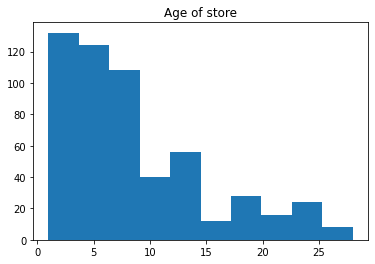

In [10]:
plt.title("Age of store")
plt.rcParams['figure.figsize'] = [10,6]
plt.hist(data['AgeOfStore'])

### Sales distribution 

(array([ 10.,  35.,  85., 146., 122.,  57.,   9.,  37.,  30.,  17.]),
 array([17.34 , 25.571, 33.802, 42.033, 50.264, 58.495, 66.726, 74.957,
        83.188, 91.419, 99.65 ]),
 <BarContainer object of 10 artists>)

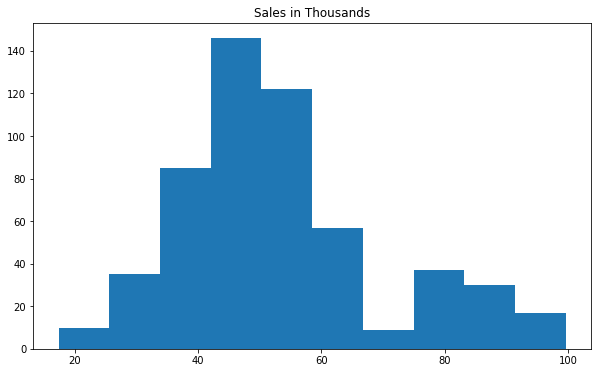

In [12]:
plt.title("Sales in Thousands")
plt.rcParams['figure.figsize'] = [10,6]
plt.hist(data['SalesInThousands'])

### Distribution of sales per month generated by stores of different ages.

In [13]:
age_sum = data[['AgeOfStore','SalesInThousands']].groupby('AgeOfStore').sum()

In [14]:
age_sum.columns

Index(['SalesInThousands'], dtype='object')

In [15]:
x_val = [i for i in range(1, 26)]
y_val = age_sum['SalesInThousands']


<BarContainer object of 25 artists>

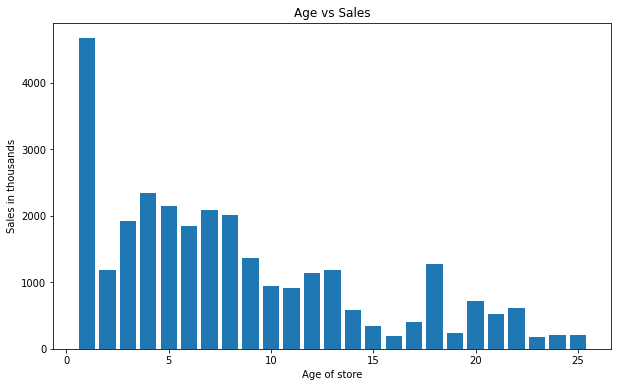

In [16]:
plt.xlabel("Age of store")
plt.ylabel("Sales in thousands")
plt.title("Age vs Sales")
plt.bar(x_val,y_val)


### Mean of sales given by shotps of different ages 

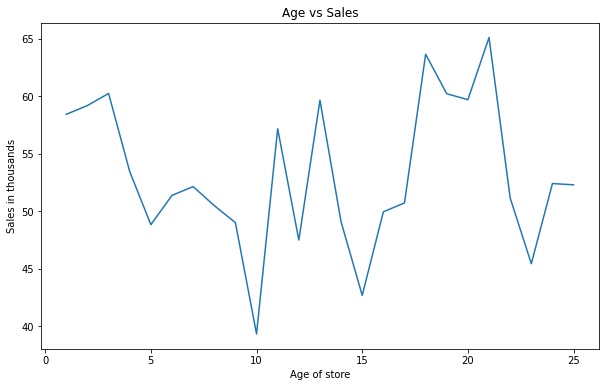

In [17]:
data_mod = data[["SalesInThousands", "AgeOfStore"]].groupby("AgeOfStore").mean()
x_val = [i for i in range(1, 26)]
y_val = data_mod['SalesInThousands']
plt.xlabel("Age of store")
plt.ylabel("Sales in thousands")
plt.title("Age vs Sales")
plt.plot(x_val,y_val)

### Distribution of Market sizes of shops 

In [18]:
market_size = data[["MarketSize","MarketID"]].groupby("MarketSize").count()
market_label  = data["MarketSize"].drop_duplicates()
print(market_size)

# because indexes of table indexes don't match we should use reset_inex to concatenate them perfectly 
market_size = pd.concat([market_label.reset_index(drop =True),market_size["MarketID"].reset_index(drop =True)] , axis = 1)
market_size = market_size.sort_values(by = "MarketSize", ascending=False)

            MarketID
MarketSize          
Large            168
Medium           320
Small             60


<BarContainer object of 3 artists>

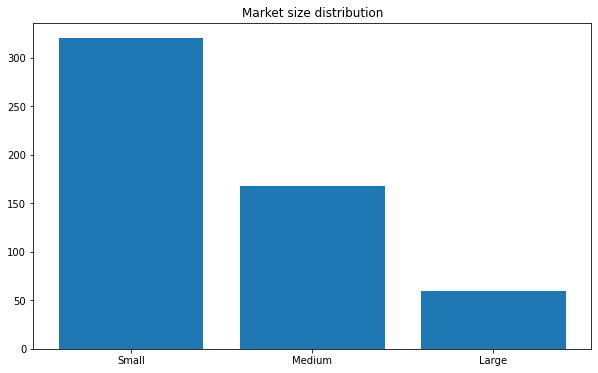

In [19]:
plt.title("Market size distribution")
x_val = market_size["MarketSize"]
y_val = market_size["MarketID"]
plt.bar(x_val, y_val)

### Average age of Market Size Group 


In [20]:
market_ages= data[["MarketSize","AgeOfStore"]].groupby("MarketSize").mean()
market_label  = data["MarketSize"].drop_duplicates()

# because indexes of table indexes don't match we should use reset_inex to concatenate them perfectly 
market_age = pd.concat([market_label.reset_index(drop =True),market_ages.reset_index(drop =True)] , axis = 1)
market_age = market_age.sort_values(by = "MarketSize", ascending=False)
market_ages.head()

,AgeOfStore
MarketSize,
Large,7.142857
Medium,8.787500
Small,10.800000


<BarContainer object of 3 artists>

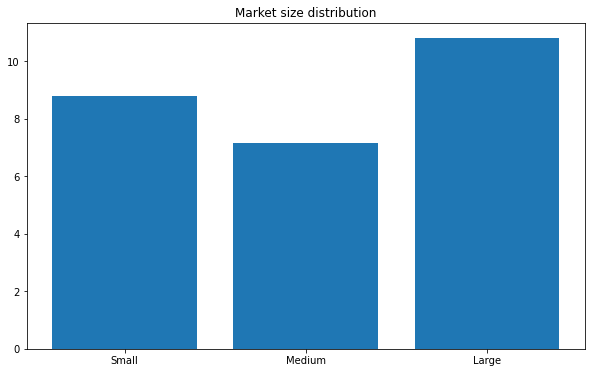

In [21]:
plt.title("Market size distribution")
x_val = market_age["MarketSize"]
y_val = market_age["AgeOfStore"]
plt.bar(x_val, y_val)

### Distribution of sales given by different market sizes

In [22]:
import seaborn as sns

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

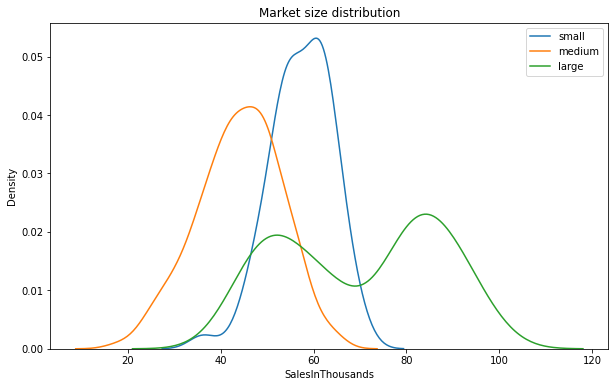

In [23]:
plt.title("Market size distribution")
small = data[data["MarketSize"] == "Small"]
medium = data[data["MarketSize"] == "Medium"]
large = data[data["MarketSize"] == "Large"]

sns.distplot(small['SalesInThousands'], hist = False , label = "small")
sns.distplot(medium['SalesInThousands'], hist = False , label = "medium")
sns.distplot(large['SalesInThousands'], hist = False , label = "large")

plt.legend(loc = "upper right")


## Now lets get to evaluating result fo A/B testing 

In [25]:
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


### Since all the  stores were devided in two group by random the final result should of sales generated by all three groups should be theoreticaly the same 

### Now lets have a look how different is average numbers of sales generated by stores in different prommotion groups 

In [26]:
market_grouped = data[['Promotion', 'SalesInThousands']].groupby(by = "Promotion").mean()
market_comp = pd.concat([data["Promotion"].sort_values().drop_duplicates().reset_index(drop = True), market_grouped.reset_index(drop = True )], axis = 1)
market_comp.columns

Index(['Promotion', 'SalesInThousands'], dtype='object')

<AxesSubplot:xlabel='Promotion', ylabel='SalesInThousands'>

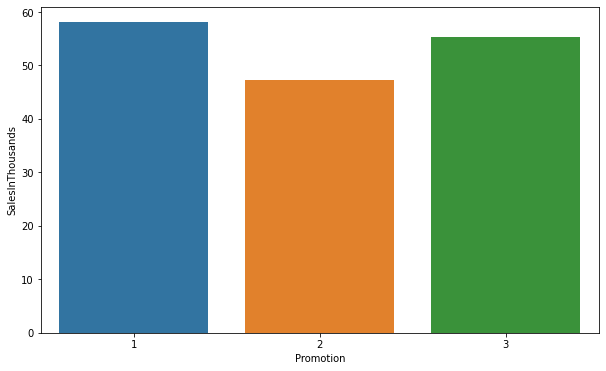

In [27]:

sns.barplot(x = 'Promotion',y  = 'SalesInThousands' ,data = market_comp)


### From the bar graph we can clearly see that stores with promotion types 1 and 3 generated more sales. But it is not enough to make any conclusions. First we should check the null hypothesys , another words deny the chance of this event occured by random  

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

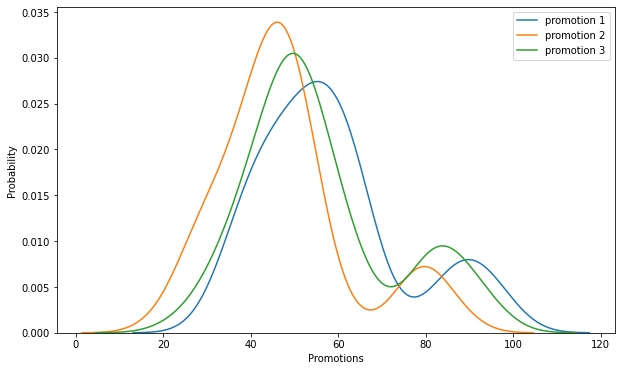

In [28]:



promotion1 = data[data['Promotion'] == 1 ]
promotion2 = data[data['Promotion'] == 2 ]
promotion3 = data[data['Promotion'] == 3 ]


sns.distplot(x =promotion1['SalesInThousands'], hist= False, label= 'promotion 1')
sns.distplot(x =promotion2['SalesInThousands'], hist= False, label = 'promotion 2')
sns.distplot(x =promotion3['SalesInThousands'], hist= False, label= 'promotion 3')
plt.legend(loc = "upper right")
plt.xlabel("Promotions")
plt.ylabel("Probability")

plt.show()

[172, 188, 188]


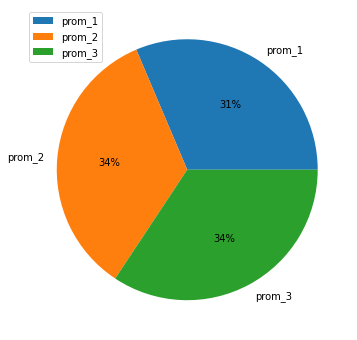

In [29]:
data_pie = data[["SalesInThousands","Promotion"]].groupby("Promotion").count()
list_pie = [i for i in data_pie['SalesInThousands']]
print(list_pie)
labels = ["prom_1","prom_2","prom_3"]
plt.pie(list_pie, labels= labels ,autopct='%.0f%%')
plt.legend(labels, loc = 'upper left')

#First thing we should do is to reject a Null hypothesis 

In [30]:
data.groupby('Promotion')
data.describe(
)

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [31]:
from scipy.stats import ttest_ind
promotion1 = data[data['Promotion'] == 1 ]
promotion2 = data[data['Promotion'] == 2 ]

prom1_vs_prom2 = ttest_ind(promotion1['SalesInThousands'], promotion2['SalesInThousands'])
prom1_vs_prom2


Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)

### because p-value is much less then acceptable 0.05 we can conlude that change that this difference occured by random is small and can reject Null hypothesis

In [32]:
from scipy.stats import ttest_ind
promotion1 = data[data['Promotion'] == 1 ]
promotion3 = data[data['Promotion'] == 3 ]

prom1_vs_prom3 = ttest_ind(promotion1['SalesInThousands'], promotion3['SalesInThousands'])
prom1_vs_prom3

Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313277)

In [33]:
from scipy.stats import ttest_ind
promotion2 = data[data['Promotion'] == 2 ]
promotion3 = data[data['Promotion'] == 3 ]

prom2_vs_prom3 = ttest_ind(promotion2['SalesInThousands'], promotion3['SalesInThousands'])
prom2_vs_prom3

Ttest_indResult(statistic=-4.88139271089348, pvalue=1.5628943036277377e-06)

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def tokey_test(df,var):
    tukey = pairwise_tukeyhsd(endog= df['SalesInThousands'], groups=df['Promotion'], alpha = 0.05)
    tukey.plot_simultaneous()
    title = "Comparation between Promotions in " + str(var)
    plt.title(title)
    plt.xlabel('Sales in Thousands')
    plt.ylabel('Promotions')


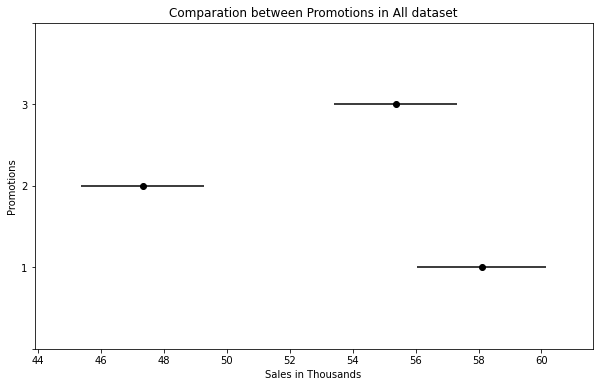

In [35]:
tokey_test(data, "All dataset")

In [36]:
data_small = data[data["MarketSize"]== "Small"]
data_medium = data[data["MarketSize"]== "Medium"]
data_large = data[data["MarketSize"]== "Large"]

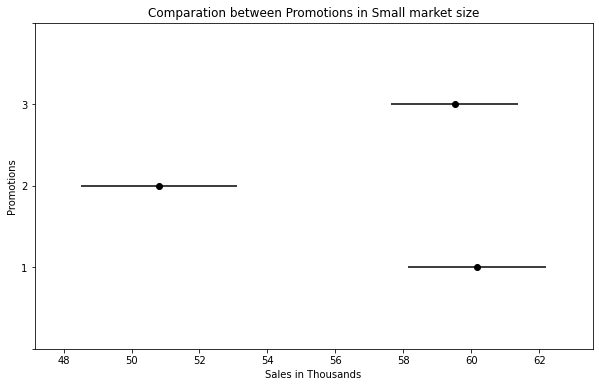

In [37]:
tokey_test(data_small, 'Small market size')

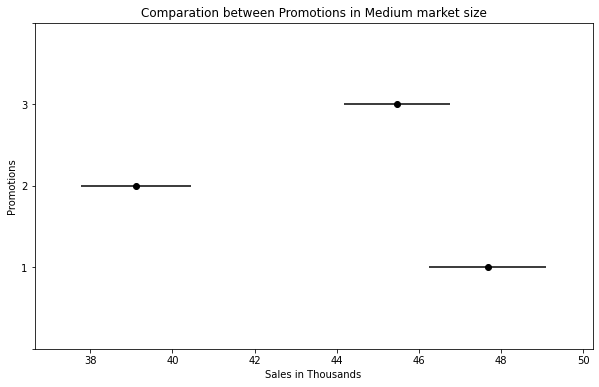

In [38]:
tokey_test(data_medium, 'Medium market size')

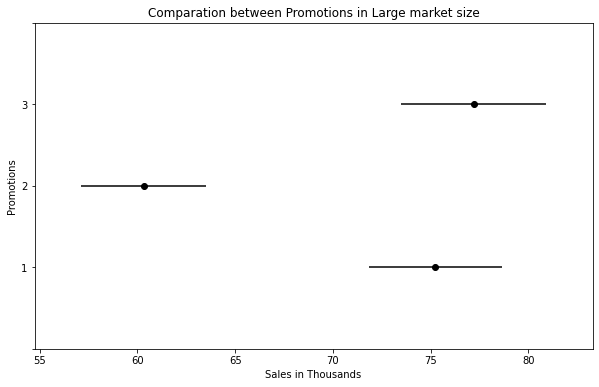

In [39]:
tokey_test(data_large, 'Large market size')

### Based on the data above we can conlude that the company should take promotion 1,3 
